In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels as sms
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
revised_data_us_zips=pd.read_csv("revised_data_us_zips.csv")
revised_loopnet_data_ca = pd.read_csv("revised_loopnet_data_ca.csv")

merged = pd.merge(left = revised_loopnet_data_ca, right = revised_data_us_zips, left_on = "zip" ,
                   right_on ="zip", how = "outer")
merged

,id_x,zip,address,price_usd,size_sf,no_stories,property_type,year_built,year_renovated,parking_ratio,...,gross_rent_multiplier,id_y,city,state_id,state_name,density,county_name,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,1.0,90066,"4077 McLaughlin Ave, Los Angeles, CA 90066 - M...",3895000,8156,2,Multifamily,1964,\N,1.72,...,14.35,30059,Los Angeles,CA,California,4642,Los Angeles,NaN,NaN,NaN
1,14.0,90066,"3451 Beethoven St, Los Angeles, CA 90066 - Mul...",2000000,2700,2,Multifamily,1961,\N,1.11,...,18,30059,Los Angeles,CA,California,4642,Los Angeles,NaN,NaN,NaN
2,67.0,90066,"3814 Lyceum Ave, Los Angeles, CA 90066 - Multi...",1395000,1624,1,Multifamily,1953,\N,\N,...,\N,30059,Los Angeles,CA,California,4642,Los Angeles,NaN,NaN,NaN
3,74.0,90066,"4417 Campbell Dr, Los Angeles, CA 90066 - Mult...",2350000,3646,2,Multifamily,1928,1990,1.1,...,13.46,30059,Los Angeles,CA,California,4642,Los Angeles,NaN,NaN,NaN
4,161.0,90066,"3611 S Centinela Ave, Los Angeles, CA 90066 - ...",4150000,7266,2,Multifamily,1988,\N,2.2,...,16.2,30059,Los Angeles,CA,California,4642,Los Angeles,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11904,NaN,99923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,33117,Hyder,AK,Alaska,0.3,Prince of Wales-Hyder,NaN,NaN,NaN
11905,NaN,99925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,33118,Klawock,AK,Alaska,6.3,Prince of Wales-Hyder,NaN,NaN,NaN
11906,NaN,99926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,33119,Metlakatla,AK,Alaska,4.8,Prince of Wales-Hyder,NaN,NaN,NaN
11907,NaN,99927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,33120,Point Baker,AK,Alaska,0,Prince of Wales-Hyder,NaN,NaN,NaN


In [3]:
merged=merged.replace(to_replace="\\N",value=np.nan)
merged.replace([np.inf, -np.inf], np.nan, inplace = True)
merged.drop(["Unnamed: 7","Unnamed: 8","Unnamed: 9","year_renovated"],
        axis=1,inplace=True)
merged.dropna(inplace = True)

merged

,id_x,zip,address,price_usd,size_sf,no_stories,property_type,year_built,parking_ratio,no_units,lot_size_ac,building_class,cap_rate,gross_rent_multiplier,id_y,city,state_id,state_name,density,county_name
0,1.0,90066,"4077 McLaughlin Ave, Los Angeles, CA 90066 - M...",3895000,8156,2,Multifamily,1964,1.72,10,0.16,B,4.88,14.35,30059,Los Angeles,CA,California,4642,Los Angeles
4,161.0,90066,"3611 S Centinela Ave, Los Angeles, CA 90066 - ...",4150000,7266,2,Multifamily,1988,2.2,9,0.15,B,3.98,16.2,30059,Los Angeles,CA,California,4642,Los Angeles
15,927.0,90066,"12747 Mitchell Ave, Los Angeles, CA 90066 - Mu...",2195000,3062,1,Multifamily,1962,1.96,5,0.16,C,3,22.88,30059,Los Angeles,CA,California,4642,Los Angeles
54,166435.0,90066,"4320 S Centinela Ave, Los Angeles, CA 90066 - ...",7995000,21268,3,Multifamily,1990,0.71,15,0.24,B,3.45,16.92,30059,Los Angeles,CA,California,4642,Los Angeles
58,168418.0,90066,"11411 Washington Pl, Los Angeles, CA 90066 - M...",1600000,3000,2,Multifamily,1952,1.33,4,0.11,C,3.26,18.28,30059,Los Angeles,CA,California,4642,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8625,166269.0,91501,"550 E Providencia Ave, Burbank, CA 91501 - Mul...",2300000,5768,2,Multifamily,1977,0.87,5,0.16,C,3.53,18.8,30250,Burbank,CA,California,1996.1,Los Angeles
8626,166270.0,91501,"603 S 6th St, Burbank, CA 91501 - FULLY RENOVA...",999000,2026,1,Multifamily,1948,1.48,2,0.16,C,4.52,16.17,30250,Burbank,CA,California,1996.1,Los Angeles
8893,164355.0,90270,"5418 Gifford Ave, Maywood, CA 90270 - Multifam...",795000,1728,1,Multifamily,1936,3.47,3,0.14,C,5.75,13.52,30095,Maywood,CA,California,8350.2,Los Angeles
8905,175530.0,90240,"7348-7350 Florence Avenue, Downey, CA 90240 - ...",5500000,15576,2,Multifamily,1960,2.57,20,0.94,C,4.08,14.5,30080,Downey,CA,California,3464.1,Los Angeles


In [4]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 692 entries, 0 to 9060
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_x                   692 non-null    float64
 1   zip                    692 non-null    int64  
 2   address                692 non-null    object 
 3   price_usd              692 non-null    object 
 4   size_sf                692 non-null    object 
 5   no_stories             692 non-null    object 
 6   property_type          692 non-null    object 
 7   year_built             692 non-null    object 
 8   parking_ratio          692 non-null    object 
 9   no_units               692 non-null    object 
 10  lot_size_ac            692 non-null    object 
 11  building_class         692 non-null    object 
 12  cap_rate               692 non-null    object 
 13  gross_rent_multiplier  692 non-null    object 
 14  id_y                   692 non-null    int64  
 15  city 

In [5]:
df=merged.copy()
df.iloc[:,3:6]=df.iloc[:,3:6].astype('float')
df.iloc[:,7:11]=df.iloc[:,7:11].astype('float')
df.iloc[:,12:14]=df.iloc[:,12:14].astype('float')
df.iloc[:,18]=df.iloc[:,18].astype('float')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 692 entries, 0 to 9060
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_x                   692 non-null    float64
 1   zip                    692 non-null    int64  
 2   address                692 non-null    object 
 3   price_usd              692 non-null    float64
 4   size_sf                692 non-null    float64
 5   no_stories             692 non-null    float64
 6   property_type          692 non-null    object 
 7   year_built             692 non-null    float64
 8   parking_ratio          692 non-null    float64
 9   no_units               692 non-null    float64
 10  lot_size_ac            692 non-null    float64
 11  building_class         692 non-null    object 
 12  cap_rate               692 non-null    float64
 13  gross_rent_multiplier  692 non-null    float64
 14  id_y                   692 non-null    int64  
 15  city 

## Decision Tree

In [7]:
x = df.values[:, [4,5,7,8,9,10,12,13,18]]
y = df.values[:,3]

In [8]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
model = regressor.fit(x, y)

In [9]:
## It can't be predicted using all indpendent variables, thus, we use the size_sf as the most signifcant predictor 

In [10]:
X = df.values[:, 4:5]
Y = df.values[:, 3]
Y.reshape(-1,1)
X.reshape(-1,1)
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, Y)

DecisionTreeRegressor(random_state=0)

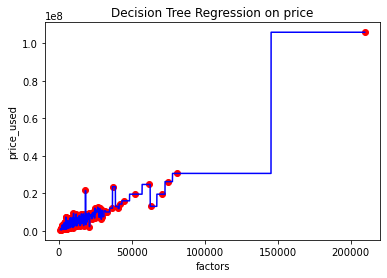

In [11]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, Y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Decision Tree Regression on price')
plt.xlabel('factors')
plt.ylabel('price_used')
plt.show()

## Random Forest

In [12]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x, y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [13]:
## using the size square feet as the predictor 

In [14]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, Y)

RandomForestRegressor(n_estimators=10, random_state=0)

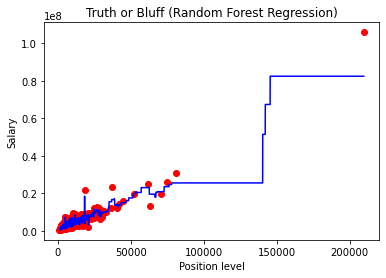

In [15]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()